<a href="https://colab.research.google.com/github/Jobernal10/Ingenieria-de-sistemas-1/blob/main/Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajuste de curvas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/2.0_Ajuste_de_curvas.ipynb)

## Polinomio de interpolación de Lagrange

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


In [ ]:
from math import *


def LagrangePol(datos):
    """
    Implementación del interpolador de Lagrange
    Entradas:
    datos -- lista de puntos (x, y) en el plano
    Salida:
    P -- función de interpolación
    """

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1
        for i, p in enumerate(datos):
            if i != k:
                out *= (x - p[0])/(datos[k][0] - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P
datos=[(-4.5, -20.625), (-3.5, 14.625), (-2.5, 28.875), (-1.5, 28.125),
(-0.5, 18.375), (0.5, 5.625), (1.5, -4.125), (2.5, -4.875), (3.5, 9.375), (4.5, 44.625)]
1.
 

1.0

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'ro')
plt.plot(xi, LagrangePol(datos),'-')
plt.show()

TypeError: ignored

ValueError: ignored

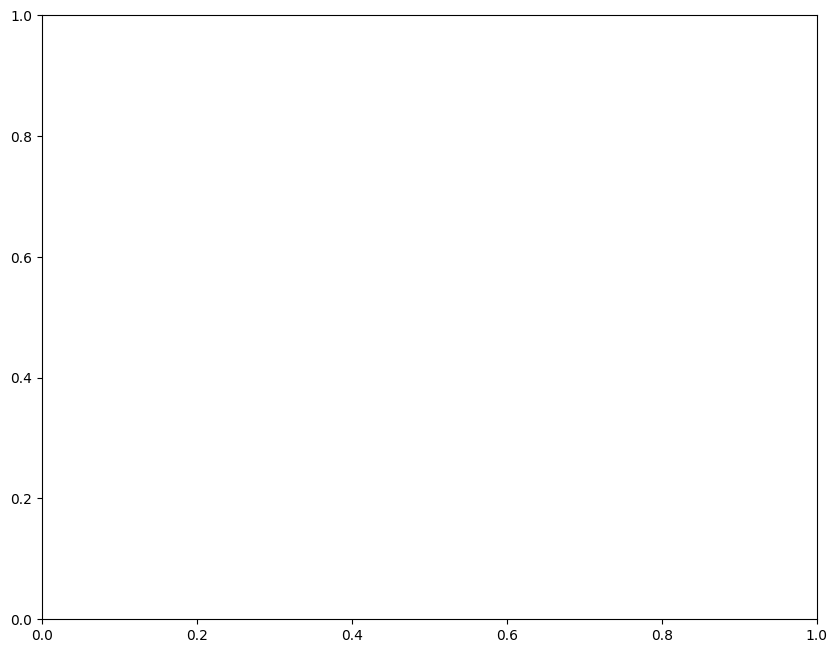

In [ ]:
f= lambda x:1.30104260698261e-18*x**9 + 8.67361737988404e-19*x**8 - 5.55111512312578e-17*x**7 + 5.55111512312578e-17*x**6 + 3.33066907387547e-16*x**5 - 4.44089209850063e-16*x**4 + 0.999999999999997*x**3 - 13.0*x + 12.0
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

# Método de Newton

In [ ]:
from math import *
from pprint import pprint


def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P



In [ ]:
import numpy as np
datost = [(-4.5,-20.625), (-3.5, 14.625), (-2.5, 28.875), (-1.5, 28.125), (-0.5, 18.375), (0.5, 5.625), (1.5, -4.125), (2.5, -4.875), (3.5, 9.375), (4.5, 44.625)]
T, P = NewtonPol(datost)
print("Tabla de diferencias divididas:")
pprint(T)
print("Evaluar el polinomio en x = 0:")


Tabla de diferencias divididas:
[[-20.625, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [14.625, 35.25, 0, 0, 0, 0, 0, 0, 0, 0],
 [28.875, 14.25, -10.5, 0, 0, 0, 0, 0, 0, 0],
 [28.125, -0.75, -7.5, 1.0, 0, 0, 0, 0, 0, 0],
 [18.375, -9.75, -4.5, 1.0, 0.0, 0, 0, 0, 0, 0],
 [5.625, -12.75, -1.5, 1.0, 0.0, 0.0, 0, 0, 0, 0],
 [-4.125, -9.75, 1.5, 1.0, 0.0, 0.0, 0.0, 0, 0, 0],
 [-4.875, -0.75, 4.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 0],
 [9.375, 14.25, 7.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
 [44.625, 35.25, 10.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Evaluar el polinomio en x = 0:


In [ ]:
P(np.pi/3)

-0.4651875477669165

In [ ]:
np.sin(np.pi/3)

0.8660254037844386

In [ ]:
# Gráfica
f = lambda x: 1.30104260698261e-18*x**9 + 8.67361737988404e-19*x**8 - 5.55111512312578e-17*x**7 + 5.55111512312578e-17*x**6 + 3.33066907387547e-16*x**5 - 4.44089209850063e-16*x**4 + 0.999999999999997*x**3 - 13.0*x + 12.0
pxi = np.linspace(-np.pi,np.pi,100000)
pfi = P(pxi)
xi = [-np.pi/2, np.pi/6, np.pi/4, np.pi/2]
fi = f(xi)
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi , label = 'Polinomio')
plt.plot(pxi,f(pxi) , label = 'función')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

TypeError: ignored

# Regresón Polinomial

In [ ]:
import random
a_0, a_1, a_2 = 10, 6, -3
f = lambda x: a_0 + a_1*x + a_2*(x)**2
def f_cuadrada(x):
    noise = random.randrange(-100, 100, 1)/10
    return a_0 + a_1*x + a_2*(x**2) + noise

[-5.    -4.999 -4.998 ...  4.998  4.999  5.   ]
[-96.1, -73.35, -58.0, -54.65, -26.2, -14.35, -15.1, -5.65, 4.4, 11.85, 13.0, 3.65, 11.6, 5.35, 11.8, 6.65, 8.6, -15.35, -5.4, -25.75, -27.3]


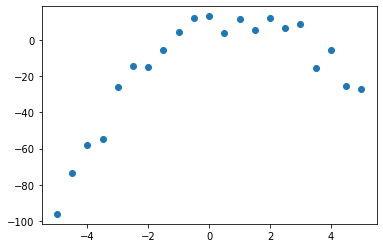

In [ ]:
x = np.linspace(-5,5,21)
xi = np.linspace(-5,5,10001)
images = list()
for i in x:
    images.append(round(f_cuadrada(i),2))
x = np.array(x)
y = np.array(images)
print(xi)
print(images)
plt.plot(x, images,'o')
#plt.plot(xi, f(xi),'-')
plt.show()

In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4)
print(sum_yi, sum_xiyi, sum_xi_2yi)

0.0 192.5 0.0 3166.625
-340.29999999999995 1136.45 -7164.2


In [ ]:
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(solve)

[-2.88492377  5.90363636 10.24037267]


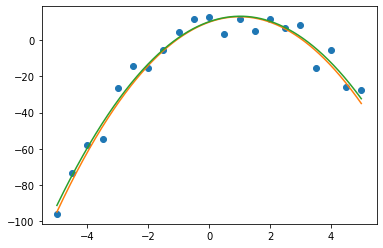

In [ ]:
g = lambda x: solve[0]*x**2 + solve[1]*x + solve[2]
plt.plot(x, images,'o')
plt.plot(xi, f(xi),'-')
plt.plot(xi, g(xi),'-')
plt.show()

In [ ]:
import random
a_0, a_1 = 7, 0.323
f = lambda x: a_0*np.exp(a_1*x)
def f_noise(x):
    noise = random.randrange(-500, 500, 1)/200
    return a_0*np.exp(a_1*x) + noise

In [ ]:
x = np.linspace(0,5,21)
xi = np.linspace(np.min(x),np.max(x),1001)
y = list()
for i in x:
    y.append(round(f_noise(i),2))
y = np.array(y)
plt.plot(x, y,'o')
# plt.plot(xi, f(xi),'-')
plt.show()

In [ ]:
print(x)
print(y)

In [ ]:
# Evaluar el logaritmo natural de y
Y = np.log(y)
print(Y)

In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(solve)

# Transformaciones

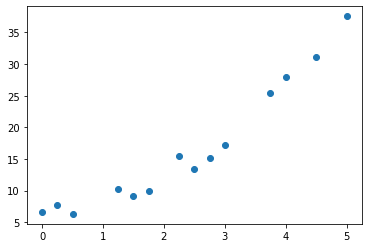

In [ ]:
# parámetros a_0, a_1 = 7, 0.323
# función a_0*np.exp(a_1*x)

x = [0., 0.25, 0.5, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75, 3, 3.75, 4, 4.5, 5]
y = [6.55, 7.71, 6.3, 10.19, 9.15, 9.96, 15.45, 13.43, 15.11, 17.16, 25.44, 27.97, 31.17, 37.57]
x, y = np.array(x), np.array(y)
plt.plot(x, y,'o')
# plt.plot(xi, f(xi),'-') ORIGINAL
plt.show()

# Regresión Lineal

In [ ]:
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.601, 0.429, 0.290, 0.219, 0.142]

x, y = np.array(x), np.array(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_yi:.3f}, sum_xiyi: {sum_xiyi:.3f}')
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve}')
print(f'Regresión lineal: y = {solve[0]:.3f}x + {solve[1]:.3f}')
f_lin = lambda x: solve[0]*x + solve[1]

sum_xi: 5.000, sum_xi_2: 7.500
sum_yi: 1.681, sum_xiyi: 1.117
Solución del sistema: [-0.2256  0.5618]
Regresión lineal: y = -0.226x + 0.562


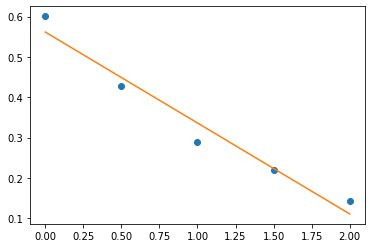

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
x, y = np.array(x), np.array(y)
x_reshape = x.reshape(-1, 1)
lin_reg = LinearRegression().fit(x_reshape, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.score(x_reshape, y)

67.87274545454548 [0.96934545]


0.8905019357927553

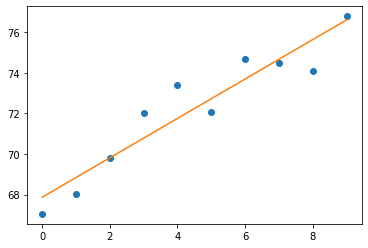

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
y_pred = lin_reg.predict(xi.reshape((-1,1)))
plt.plot(x, y,'o')
plt.plot(xi, y_pred,'-')
plt.show()

45 285 2025 15333
722.3480000000002 3330.537 21268.455
Regresión cuadrática: y = -0.072x^2 + 1.621x + 67.005


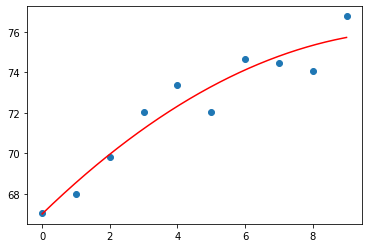

In [ ]:
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
x, y = np.array(x), np.array(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4)
print(sum_yi, sum_xiyi, sum_xi_2yi)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_2 = np.linalg.solve(a, b)
f_cuad = lambda x: solve_2[0]*x**2 + solve_2[1]*x + solve_2[2]
print(f'Regresión cuadrática: y = {solve_2[0]:.3f}x^2 + {solve_2[1]:.3f}x + {solve_2[2]:.3f}')
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
#plt.plot(xi, f_lin(xi),'-')
plt.plot(xi, f_cuad(xi),'r-')
plt.show()


# Regresión exponencial

In [ ]:
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
x, y = np.array(x), np.array(y)
Y = np.log(y)
print(Y)

[4.20546844 4.21962535 4.24567699 4.2769994  4.29592394 4.27754074
 4.31306501 4.31062461 4.30494309 4.34090512]


In [ ]:
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.601, 0.429, 0.290, 0.219, 0.142]
Y = [-0.50916034, -0.84629836, -1.23787436, -1.51868355, -1.95192822]

x, y = np.array(x), np.array(y)

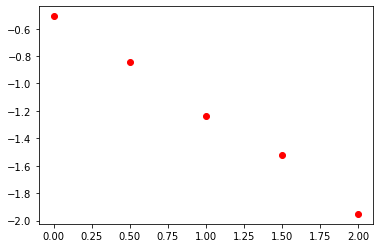

In [ ]:
plt.plot(x, Y,'ro')
plt.show()

In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_Yi = np.sum(Y)
sum_xiYi = np.sum(x*Y)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_Yi:.3f}, sum_xiyi: {sum_xiYi:.3f}')
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiYi ,sum_Yi])
solve_3 = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve_3}')
print(f'Regresión lineal (transformada semi-log): Y = {solve_3[0]:.3f}x + {solve_3[1]:.3f}')
f_trans_lin = lambda x: solve_3[0]*x + solve_3[1]

sum_xi: 5.000, sum_xi_2: 7.500
sum_yi: -6.064, sum_xiyi: -7.843
Solución del sistema: [-0.71158419 -0.50120478]
Regresión lineal (transformada semi-log): Y = -0.712x + -0.501


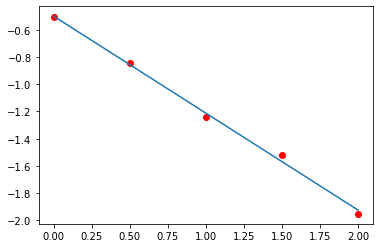

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, Y,'ro')
plt.plot(xi, f_trans_lin(xi),'-')
plt.show()

In [ ]:
f_exp = lambda x: np.exp(solve_3[1]) * np.exp(solve_3[0]*x)
a_0, a_1  = np.exp(solve_3[1]), solve_3[0]
print(f'Regresión exponencial: Y = {a_0:.3f}*e^({a_1:.3f}*x)')

Regresión exponencial: Y = 0.606*e^(-0.712*x)


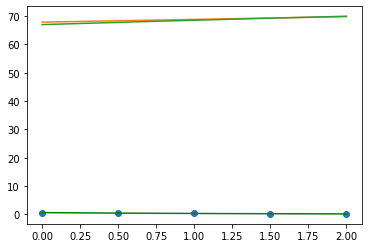

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.plot(xi, f_cuad(xi),'-')
plt.plot(xi, f_exp(xi),'g-')
plt.show()

## Potencia

In [ ]:
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
x, y = np.array(x), np.array(y)
Y = np.log(y)
X = np.log(x)
print(Y)
print(X)

[4.20546844 4.21962535 4.24567699 4.2769994  4.29592394 4.27754074
 4.31306501 4.31062461 4.30494309 4.34090512]
[      -inf 0.         0.69314718 1.09861229 1.38629436 1.60943791
 1.79175947 1.94591015 2.07944154 2.19722458]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


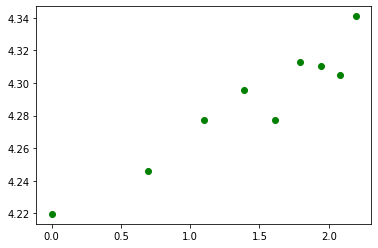

In [ ]:
Xi = np.linspace(np.min(X),np.max(X),1001)
plt.plot(X, Y,'go')
plt.show()

In [ ]:
sum_Xi = np.sum(X)
sum_Xi_2 = np.sum(X**2)
sum_Yi = np.sum(Y)
sum_XiYi = np.sum(X*Y)
print(f'sum_xi: {sum_Xi:.3f}, sum_xi_2: {sum_Xi_2:.3f}')
print(f'sum_yi: {sum_Yi:.3f}, sum_xiyi: {sum_XiYi:.3f}')
a = np.array([[sum_Xi_2, sum_Xi],
              [sum_Xi, len(X)]])
b = np.array([sum_XiYi ,sum_Yi])
solve_4 = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve_4}')
print(f'Regresión lineal (transformada log-log): Y = {solve_4[0]:.3f}X + {solve_4[1]:.3f}')
f_trans_lin_2 = lambda x: solve_4[0]*x + solve_4[1]

sum_xi: -inf, sum_xi_2: inf
sum_yi: 42.791, sum_xiyi: -inf
Solución del sistema: [nan nan]
Regresión lineal (transformada log-log): Y = nanX + nan


/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


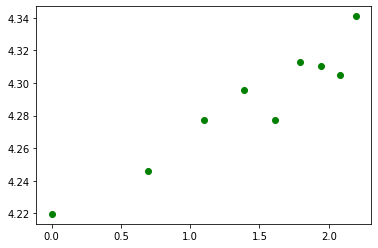

In [ ]:
Xi = np.linspace(np.min(X),np.max(X),1001)
plt.plot(X, Y,'go')
plt.plot(Xi, f_trans_lin_2(Xi),'-')
plt.show()

In [ ]:
np.exp(solve_4[1])

nan

In [ ]:
f_pot = lambda x: np.exp(solve_4[1]) * x**(solve_4[0])
a_0, a_1  = np.exp(solve_4[1]), solve_4[0]
print(f'Regresión exponencial: Y = {a_0:.3f}*x^({a_1:.3f})')

Regresión exponencial: Y = nan*x^(nan)


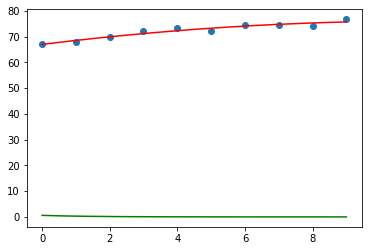

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
#plt.plot(xi, f_lin(xi),'-')
plt.plot(xi, f_cuad(xi),'r-')
plt.plot(xi, f_exp(xi),'g-')
plt.plot(xi, f_pot(xi),'b-')
plt.show()

# Coeficiente de determinación


## regresión lineal

In [ ]:
x = [0., 0.25, 0.5, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75, 3, 3.75, 4, 4.5, 5]
y = [6.55, 7.71, 6.3, 10.19, 9.15, 9.96, 15.45, 13.43, 15.11, 17.16, 25.44, 27.97, 31.17, 37.57]
x, y = np.array(x), np.array(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_yi:.3f}, sum_xiyi: {sum_xiyi:.3f}')
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve}')
print(f'Regresión lineal: y = {solve[0]:.3f}x + {solve[1]:.3f}')
f_lin = lambda x: solve[0]*x + solve[1]

sum_xi: 33.000, sum_xi_2: 110.375
sum_yi: 233.160, sum_xiyi: 745.735
Solución del sistema: [6.01865205 2.46746301]
Regresión lineal: y = 6.019x + 2.467


In [ ]:
y_media = y.mean()
y_predict = f_lin(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
print(s_t, s_r)
r_2 = (s_t - s_r) / s_t
r_2

1300.116942857143 119.59703364383567


0.9080105568188285

# regresión cuadrática

In [ ]:
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.601, 0.429, 0.290, 0.219, 0.142]
x, y = np.array(x), np.array(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4)
print(sum_yi, sum_xiyi, sum_xi_2yi)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_2 = np.linalg.solve(a, b)
f_cuad = lambda x: solve_2[0]*x**2 + solve_2[1]*x + solve_2[2]
print(f'Regresión cuadrática: y = {solve_2[0]:.3f}x^2 + {solve_2[1]:.3f}x + {solve_2[2]:.3f}')

5.0 7.5 12.5 22.125
1.681 1.117 1.458
Regresión cuadrática: y = 0.074x^2 + -0.373x + 0.599


In [ ]:
y_media = y.mean()
y_predict = f_cuad(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
print(s_t, s_r)
r_2 = (s_t - s_r) / s_t
r_2

0.1323148 0.0003218285714285716


0.9975677054159583

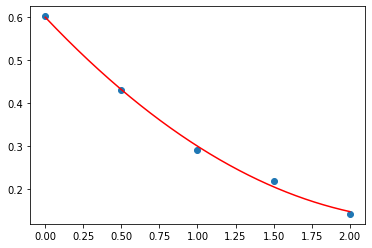

In [ ]:
plt.plot(x, y,'o')
#plt.plot(xi, f_lin(xi),'-')
plt.plot(xi, f_cuad(xi),'r-')
plt.show()

# regresión exponencial

In [ ]:
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.601, 0.429, 0.290, 0.219, 0.142]
x, y = np.array(x), np.array(y)


In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4)
print(sum_yi, sum_xiyi, sum_xi_2yi)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_3 = np.linalg.solve(a, b)
f_exp = lambda x: np.exp(solve_3[1]) * np.exp(solve_3[0]*x)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_Yi:.3f}, sum_xiyi: {sum_xiYi:.3f}')
print(f'Solución del sistema: {solve_3}')

5.0 7.5 12.5 22.125
1.681 1.117 1.458
sum_xi: 5.000, sum_xi_2: 7.500
sum_yi: -6.064, sum_xiyi: -7.843
Solución del sistema: [ 0.07371429 -0.37302857  0.59865714]


In [ ]:
y_media = y.mean()
y_predict = f_exp(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
print(s_t, s_r)
r_2 = (s_t - s_r) / s_t
r_2

0.1323148 1.02594800980551


-6.753841670058904

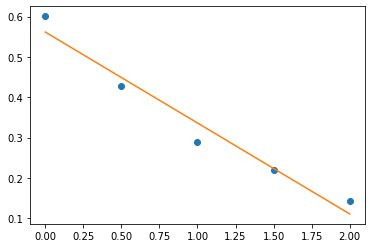

In [ ]:
# parámetros a_0, a_1 = 7, 0.323
# función a_0*np.exp(a_1*x)
plt.plot(x, y,'o')
plt.plot(xi, f(xi),'-') 
plt.show()

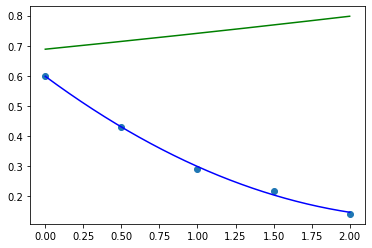

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
# plt.plot(xi, f_lin(xi),'-')
plt.plot(xi, f_cuad(xi),'b-')
plt.plot(xi, f_exp(xi),'g-')
plt.show()

# Regresión Lineal

In [ ]:
x = [0., 0.25, 0.5, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75, 3, 3.75, 4, 4.5, 5]
y = [6.55, 7.71, 6.3, 10.19, 9.15, 9.96, 15.45, 13.43, 15.11, 17.16, 25.44, 27.97, 31.17, 37.57]
x, y = np.array(x), np.array(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_yi:.3f}, sum_xiyi: {sum_xiyi:.3f}')
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve}')
print(f'Ecuación lineal: y = {solve[0]:.3f}x + {solve[1]:.3f}')
f_lin = lambda x: solve[0]*x + solve[1]

sum_xi: 33.000, sum_xi_2: 110.375
sum_yi: 233.160, sum_xiyi: 745.735
Solución del sistema: [6.01865205 2.46746301]
Ecuación lineal: y = 6.019x + 2.467


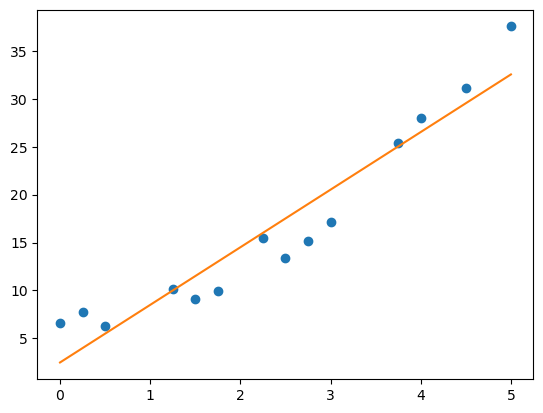

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
x_reshape = x.reshape(-1, 1)
lin_reg = LinearRegression().fit(x_reshape, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.score(x_reshape, y)

0.5618000000000001 [-0.2256]


0.9616339215265413

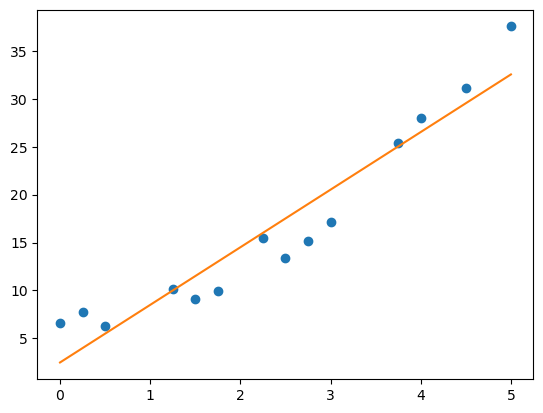

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
y_pred = lin_reg.predict(xi.reshape((-1,1)))
plt.plot(x, y,'o')
plt.plot(xi, y_pred,'-')
plt.show()

# Regresión exponencial

In [ ]:
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.601, 0.429, 0.290, 0.219, 0.142]
x, y = np.array(x), np.array(y)
Y = np.log(y)
print(Y)

[-0.50916034 -0.84629836 -1.23787436 -1.51868355 -1.95192822]


In [ ]:
Y = [-0.50916034, -0.84629836, -1.23787436, -1.51868355, -1.95192822]

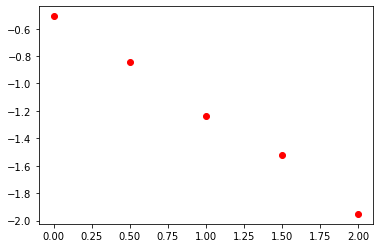

In [ ]:
plt.plot(x, Y,'ro')
plt.show()

In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_Yi = np.sum(Y)
sum_xiYi = np.sum(x*Y)
print(f'sum_xi: {sum_xi:.3f}, sum_xi_2: {sum_xi_2:.3f}')
print(f'sum_yi: {sum_Yi:.3f}, sum_xiyi: {sum_xiYi:.3f}')
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiYi ,sum_Yi])
solve = np.linalg.solve(a, b)
print(f'Solución del sistema: {solve}')
print(f'Ecuación lineal (transformada semi-log): Y = {solve[0]:.3f}x + {solve[1]:.3f}')
f_trans_lin = lambda x: solve[0]*x + solve[1]

sum_xi: 5.000, sum_xi_2: 7.500
sum_yi: -6.064, sum_xiyi: -7.843
Solución del sistema: [-0.71158419 -0.50120478]
Ecuación lineal (transformada semi-log): Y = -0.712x + -0.501


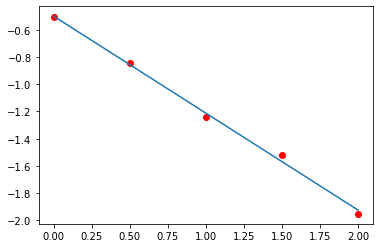

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, Y,'ro')
plt.plot(xi, f_trans_lin(xi),'-')
plt.show()

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ---------------------------------------------------------------------
# Compendio de programas.
# Matemáticas para Ingeniería. Métodos numéricos con Python.
# Copyright (C) 2020 Los autores del texto.
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>
# ---------------------------------------------------------------------

# Implementación de la recta de mínimos cuadrados.

from math import *


def RectaMinSq(datos):
    """
    Implementación recta de mínimos cuadrados
    Entradas:
    datos -- lista de puntos (x, y) en el plano
    Salida:
    P -- recta de mínimos cuadrados
    """
    X = sum([p[0] for p in datos])
    Y = sum([p[1] for p in datos])
    XX = sum([(p[0])**2 for p in datos])
    XY = sum([p[0]*p[1] for p in datos])
    m = len(datos)

    def P(x):
        """Recta de mínimos cuadrados"""
        a0 = (Y*XX - X*XY)/(m*XX - X**2)
        a1 = (m*XY - X*Y)/(m*XX - X**2)
        return a0 + a1*x

    return P



def ErrorSq(f, datos):
    """Calcular error cuadrático"""
    E = sum([(p[1] - f(p[0]))**2 for p in datos])
    print (E)
    return E
  


# datos de prueba
datos = [(0, 67.052), (1, 68.008), (2, 69.803), (3,72.024), (4, 73.4), (5,72.063), (6, 74.669), (7,74.487), (8, 74.065), (9,76.777)]
f = RectaMinSq(datos)
print("Recta de ajuste. Evaluar en x = 0:")
print("{0:.10f}".format(f(0)))





Recta de ajuste. Evaluar en x = 0:
67.8727454545


ValueError: ignored

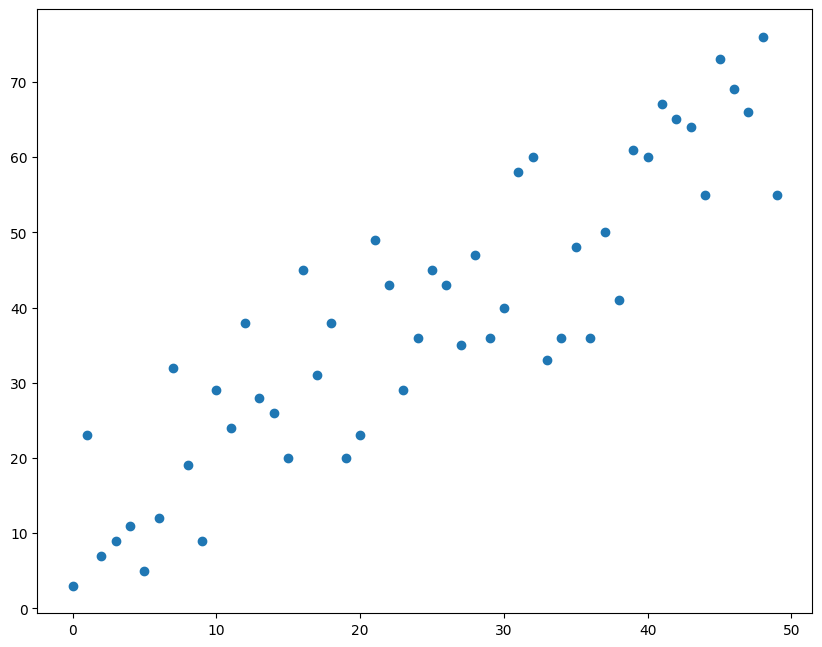

In [ ]:
xi = np.linspace(np.min(x),np.max(x),1001)
y_pred = RectaMinSq([(5.0, 1.681), (1.117, 7.5)])
plt.plot(x, y,'o')
plt.plot(xi, y_pred,'-')
plt.show()

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

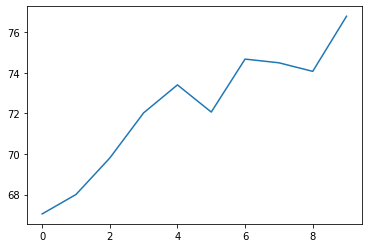

In [ ]:
x = [0,	1,	2,	3,	4,	5,	6,	7,	8,	9]
y = [67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777]
plt.plot(x, y,'-')
plt.show()

Regresión lineal: y = 0.969x + 67.873


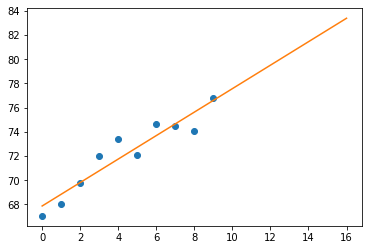

Coeficiente de determinación: 0.8905019357927557


In [7]:
#Lineal
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve_lineal = np.linalg.solve(a, b)

print(f'Regresión lineal: y = {solve_lineal[0]:.3f}x + {solve_lineal[1]:.3f}')
f_lin = lambda x: solve_lineal[0]*x + solve_lineal[1]

xi = np.linspace(np.min(x),np.max(x+7),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_lin(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_lin = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_lin}')

Regresión cuadrática: y = -0.072x^2 + 1.621x + 67.005


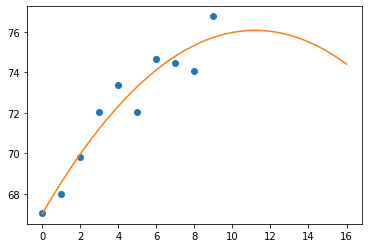

Coeficiente de determinación: 0.9222532745110213


In [8]:
#cuadratica
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cuad = np.linalg.solve(a, b)
f_cuad = lambda x: solve_cuad[0]*x**2 + solve_cuad[1]*x + solve_cuad[2]
print(f'Regresión cuadrática: y = {solve_cuad[0]:.3f}x^2 + {solve_cuad[1]:.3f}x + {solve_cuad[2]:.3f}')

xi = np.linspace(np.min(x),np.max(x+7),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_cuad(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_cuad(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_cuad = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_cuad}')

Regresión exponencial: Y = 67.914*e^(0.014*x)


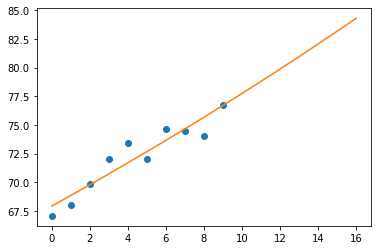

Coeficiente de determinación: 0.8844365628448531


In [6]:
#Exponencial
x = np.array([0,	1,	2,	3,	4,	5,	6,	7,	8,	9])
y = np.array([67.052,	68.008,	69.803,	72.024,	73.4,	72.063,	74.669,	74.487,	74.065,	76.777])
Y = np.log(y)

sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_Yi = np.sum(Y)
sum_xiYi = np.sum(x*Y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiYi ,sum_Yi])
solve_3 = np.linalg.solve(a, b)
f_exp = lambda x: np.exp(solve_3[1]) * np.exp(solve_3[0]*x)
a_0, a_1  = np.exp(solve_3[1]), solve_3[0]
print(f'Regresión exponencial: Y = {a_0:.3f}*e^({a_1:.3f}*x)')

xi = np.linspace(np.min(x),np.max(x+7),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_exp(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_exp(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_exp = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_exp}')

In [ ]:
print(f'Coeficiente de determinación\n'
      f'- lineal: {r_2_lin:.5f}\n'
      f'- cuadratico: {r_2_cuad:.5f}\n'
      f'- exponenncial: {r_2_exp:.5f}')

Coeficiente de determinación
- lineal: 0.89050
- cuadratico: 0.92225
- exponenncial: 0.88444


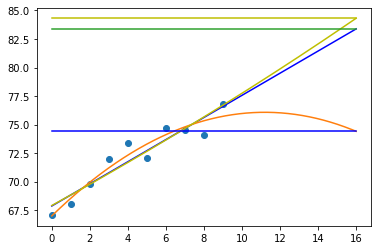

In [19]:
xi = np.linspace(np.min(x),np.max(x+7),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'b')
plt.plot(xi, f_cuad(xi),'-')
plt.plot(xi, f_exp(xi),'y')

zero = 74.4* np.ones(1001)

plt.plot(xi, zero,'b-')
z = 83.38* np.ones(1001)

plt.plot(xi, z,'-')
w = 84.3* np.ones(1001)

plt.plot(xi, w,'y-')